# Reconhecimento de locutor por redes neurais (Machine Learning)

Este projeto foi desenvolvido com o intuito de, através do aprendizado de maquina, reconhecer o locutor(detentor da feature de voz) utilizando o dataset previeamente usado no reconhecimento de digitos. 

Abaixo, é possível executar o código através das celulás de codigo do Jupyter Notebook, facilitando a visualização da aplicação como um todo.

Informações de audio:   

                        - Chroma stft
                        - Rmse
                        - Spectral Centroid
                        - Spectral Bandwidth
                        - Spectral RollOff
                        - Zero Crossing Rate
                        - Mfcc

Este bloco de código está dividido em 3 seções:
1. Extração de todas as informação dos arquivos de audio e salva-las em um arquivo CSV para leitura posterior.
2. Treinamento do dataset recolhido de quatro participantes.

## Seção 1

Nesta seção obteremos o resultado dos arquivos em csv para a utilização na modeladação da rede neural.

```
trainData     : ../data/recordings/train 
testData      : ../data/recordings/test
```


In [9]:
# Quando verdadeiro, os arquivos de audio serão lidos e suas informações serão armazenadas em um arquivo CSV
CREATE_CSV_FILES = True

In [10]:
# Definindo os nomes dos arquivos de CSV
TRAIN_CSV_FILE = "train.csv"
TEST_CSV_FILE = "test.csv"
# MORE_TRAIN_CSV_FILE = "more_train.csv"
# MORE_TEST_CSV_FILE = "more_test.csv"


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import csv
import os

def extractWavFeatures(soundFilesFolder, csvFileName):
    print("As informações dos arquivos de audio da pasta "+soundFilesFolder+" serão salvas no arquivo "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print('Cabeçalho do CSV: ', header)
    file = open(csvFileName, 'w', newline='')
    writer = csv.writer(file)
    writer.writerow(header)
    genres = '1 2 3 4 5 6 7 8 9 0'.split()
    for filename in os.listdir(soundFilesFolder):
        number = f'{soundFilesFolder}/{filename}'
        y, sr = librosa.load(number, mono=True, duration=30)
        # remove leading and trailing silence
        y, index = librosa.effects.trim(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        writer.writerow(to_append.split())
    file.close()
    print("Fim da função de extração de dados")

if (CREATE_CSV_FILES == True):
    extractWavFeatures("../data/recordings/train", TRAIN_CSV_FILE)
    extractWavFeatures("../data/recordings/test", TEST_CSV_FILE)
    # extractWavFeatures("../data/recordings/moreSpeakersTrain", MORE_TRAIN_CSV_FILE)
    # extractWavFeatures("../data/recordings/moreSpeakersTest", MORE_TEST_CSV_FILE)
    print("Os arquivos de CSV foram criados")
else:
    print("A criação dos arquivos foram puladas")

ModuleNotFoundError: No module named 'matplotlib'

In [8]:
#Lendo o dataset e convertendo o as informaçoes em seus respectivos numeros

import pandas as pd
import csv
from sklearn import preprocessing

def preProcessData(csvFileName):
    print(csvFileName+ " irá ser processado")
    data = pd.read_csv(csvFileName)
    # Temos os quatro locutores abaixo: 
    # 0: Bianca
    # 1: Christian 
    # 2: Paulo
    # 3: Roseli
    filenameArray = data['filename'] 
    
    speakerArray = []
    for i in range(len(filenameArray)):
        speaker = filenameArray[i][2]
        if speaker == "b":
            speaker = "0"
        elif speaker == "c":
            speaker = "1"
        elif speaker == "p":
            speaker = "2"
        elif speaker == "r":
            speaker = "3"
        speakerArray.append(speaker)
    data['number'] = speakerArray
    #Excluindo colunas desnecessárias
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    data.shape

    print("Pré processamento finalizado")
    return data

trainData = preProcessData(TRAIN_CSV_FILE)
testData = preProcessData(TEST_CSV_FILE)
# moreTrainData = preProcessData(MORE_TRAIN_CSV_FILE)
# moreTestData = preProcessData(MORE_TEST_CSV_FILE)


ModuleNotFoundError: No module named 'pandas'

## Seção 2

Nesta seção será feito o treinamento da rede neural utilizando o dataset de treianmento previamente pré procesasdo.

Ao todo serão utilizadas as 50 repetições de cada número dos quatro participantes, em um total de 2000 arquivos de som.
Para o teste e validação do treinamento será utilizado 1 repetição de cada número dos quatro participantes, em um total de 40 arquivos de som.

Os arquivos utilizados para o treinamento e teste são provindos dos seguintes diretórios:
* ../data/recordings/train
* ../data/recordings/test

In [8]:
# Quebrando o dataset para o treinamento, validação e teste
from sklearn.model_selection import train_test_split
X = np.array(trainData.iloc[:, :-1], dtype = float)
y = trainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]

encoder = preprocessing.LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_val = encoder.fit_transform(y_val)
y_test = encoder.fit_transform(y_test)

print("Y do dataset(infomações) de treinamento:", y_train.shape)
print("Y do dataset(infomações) de validação:", y_val.shape)
print("Y do dataset(infomações) de teste:", y_test.shape)


Y do dataset(infomações) de treinamento: (1400,)
Y do dataset(infomações) de validação: (600,)
Y do dataset(infomações) de teste: (40,)


In [9]:
# Normalizando o dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )

print("X do dataset(infomações) de treinamento:", X_train.shape)
print("X do dataset(infomações) de validação:", X_val.shape)
print("X do dataset(infomações) de teste:", X_test.shape)


X do dataset(infomações) de treinamento: (1400, 25)
X do dataset(infomações) de validação: (600, 25)
X do dataset(infomações) de teste: (40, 25)


In [10]:
# Criação do modelo de rede neural
from keras import models
from keras import layers
import keras

# Modelo 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Processo de aprendizagem do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo com 50 epocas e com um batch(lote) de 128
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128)

Epoch 1/50
11/11 [==============================] - 1s 24ms/step - loss: 2.2663 - accuracy: 0.2186 - val_loss: 1.8390 - val_accuracy: 0.7617
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 1.6428 - accuracy: 0.4979 - val_loss: 1.1479 - val_accuracy: 0.9083
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 1.0688 - accuracy: 0.7014 - val_loss: 0.4921 - val_accuracy: 0.9467
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.6566 - accuracy: 0.7907 - val_loss: 0.2233 - val_accuracy: 0.9617
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 0.4605 - accuracy: 0.8557 - val_loss: 0.1460 - val_accuracy: 0.9700
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 0.3083 - accuracy: 0.9071 - val_loss: 0.1098 - val_accuracy: 0.9783
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 0.2324 - accuracy: 0.9314 - val_loss: 0.0923 - val_accuracy: 0.9833
Epoch 8/50
11/11 [=

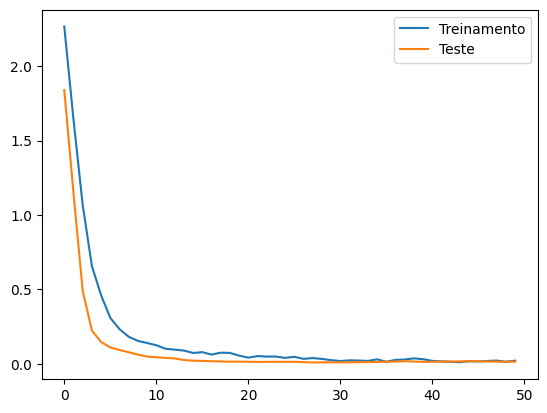

In [11]:
# Gráfico do histórico de treinamento
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='Treinamento')
pyplot.plot(history.history['val_loss'], label='Teste')
pyplot.legend()
pyplot.show()

### Auxiliary functions to show the results


In [12]:
def getSpeaker(speaker):
    speaker = str(speaker)
    if speaker == "0":
        return "Bianca"
    elif speaker == "1":
        return "Christian"
    elif speaker == "2":
        return "Paulo"
    elif speaker == "3":
        return "Roseli"
    else: 
        speaker = "Desconhecido"
        
def printPrediction(X_data, y_data, printDigit):
    print('\n# Predições')
    for i in range(len(y_data)):
        prediction = getSpeaker(np.argmax(model.predict(X_data[i:i+1])[0], axis=-1))
        speaker = getSpeaker(y_data[i])
        if printDigit == True:
            print("Numero={0:d}, y={1:10s}- predição={2:10s}- equivalencia={3}".format(i, speaker, prediction, speaker==prediction))
        else:
            print("y={0:10s}- predição={1:10s}- equivalencia={2}".format(speaker, prediction, speaker==prediction))

In [13]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

def report(X_data, y_data):
    # Matriz de confusão e Classificação
    Y_pred = np.argmax(model.predict(X_data), axis=-1)
    print(Y_pred)
    y_test_num = y_data.astype(np.int64)
    print(y_test_num)
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    print(conf_mt)
    plt.matshow(conf_mt)
    plt.show()
    print('\nClassificação')
    target_names = ["Bianca", "Christian", "Paulo", "Roseli"]
    print(classification_report(y_test_num, Y_pred))


### Apresentando a performance do modelo

In [17]:
print('\n# DADOS TESTADOS #\n')
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Predição
printPrediction(X_test[:], y_test[:], True)


# DADOS TESTADOS #

2/2 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 1.0000
accuracy: 100.00%

# Predições
1/1 [==============================] - 0s 19ms/step
Numero=0, y=Bianca    - predição=Bianca    - equivalencia=True
1/1 [==============================] - 0s 19ms/step
Numero=1, y=Christian - predição=Christian - equivalencia=True
1/1 [==============================] - 0s 18ms/step
Numero=2, y=Paulo     - predição=Paulo     - equivalencia=True
1/1 [==============================] - 0s 18ms/step
Numero=3, y=Roseli    - predição=Roseli    - equivalencia=True
1/1 [==============================] - 0s 18ms/step
Numero=4, y=Bianca    - predição=Bianca    - equivalencia=True
1/1 [==============================] - 0s 19ms/step
Numero=5, y=Christian - predição=Christian - equivalencia=True
1/1 [==============================] - 0s 18ms/step
Numero=6, y=Paulo     - predição=Paulo     - equivalencia=True
1/1 [==============================] - 0s 20ms/step
Numero

Classifição dos dados testados

2/2 [==============================] - 0s 2ms/step
[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0
 1 2 3]
[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0
 1 2 3]
[[10  0  0  0]
 [ 0 10  0  0]
 [ 0  0 10  0]
 [ 0  0  0 10]]


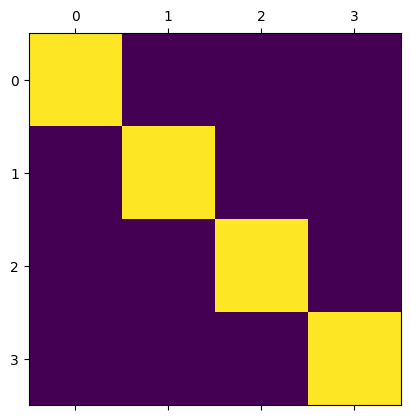


Classificação
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [15]:
print("Classifição dos dados testados\n")
report(X_test, y_test)
